In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WhatsApp.csv")


In [ ]:
df.dtypes


id        int64
year      int64
day       int64
hour      int64
minute    int64
dtype: object

In [ ]:
x = df.drop('hour', axis=1)
y = df['hour']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of Decision Tree Classifier:", accuracy)


Accuracy Score of Decision Tree Classifier: 0.9130084575110753


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 28   0   0   0   0   0   0   2   0   1   2   1   0   0   0   0   1   0
    1   0   0   0   0]
 [  2   6   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   1]
 [  2   1   0   0   0   0   0  15   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  1   0   0   0   0   0   0   1  23   0   0   1   0   0   0   0   0   0
    0   0   1   0   4]
 [  1   1   0   0   0   1   2   0   4  96   1   1   0   0   1   0   0   0
    0   0   1   1   0]
 [  0   1  

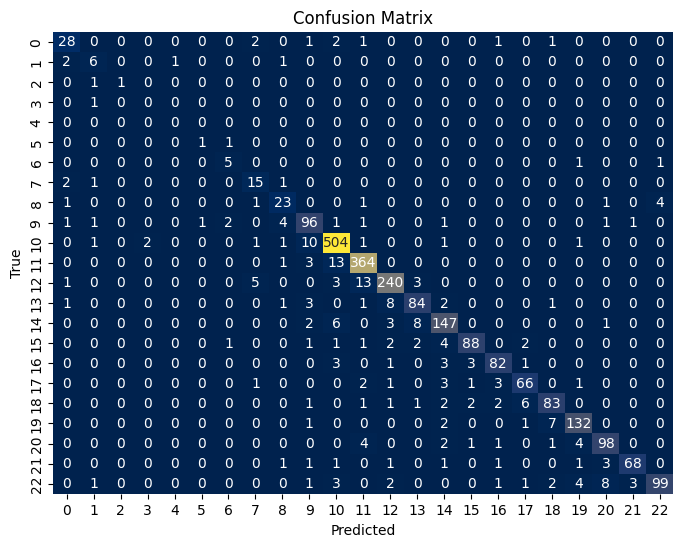

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        36
           1       0.50      0.60      0.55        10
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.50      0.50      0.50         2
           7       0.56      0.71      0.63         7
           8       0.60      0.79      0.68        19
           9       0.70      0.74      0.72        31
          10       0.80      0.87      0.83       110
          11       0.94      0.97      0.95       522
          12       0.93      0.96      0.94       381
          13       0.93      0.91      0.92       265
          14       0.86      0.83      0.84       101
          15       0.88      0.88      0.88       167
          16       0.93      0.86      0.89       102
          17       0.90      0.88      0.89        93
          18       0.86    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


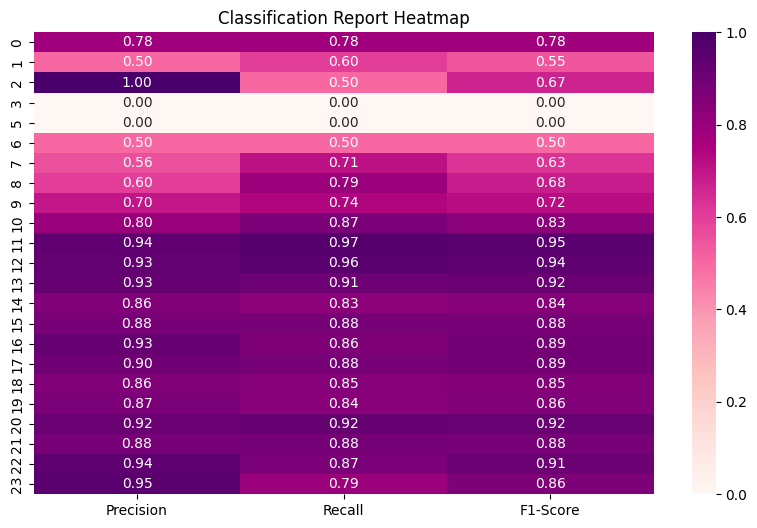

In [ ]:
from sklearn.metrics import classification_report
# Generate a classification report
clr = print(classification_report(y_test, y_pred, zero_division=0))

import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='RdPu')
plt.title('Classification Report Heatmap')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=4000, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)
y_pred = gbm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of Gradient Boosting Classifier: ", accuracy)


Accuracy Score of Gradient Boosting Classifier:  0.9113975030205397


Confusion matrix

 [[ 27   0   0   0   0   0   1   0   0   2   0   0   0   0   0   1   0   1
    1   0   1   2]
 [  1   6   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0
    0   0   0   1]
 [  0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   2]
 [  2   1   0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1]
 [  1   0   0   0   0   0   1  22   0   0   1   0   0   0   1   0   0   0
    0   0   1   4]
 [  0   0   0   0   1   2   0   4  92   5   0   0   0   0   0   0   0   2
    2   0   2   0]
 [  0   0   0   2   0   0   1   1   9 505   1   0   0   0   0   0   0   0
    2   0   0   1]
 [  0   0   0   0   0   0   0   1   2  10 364   1  

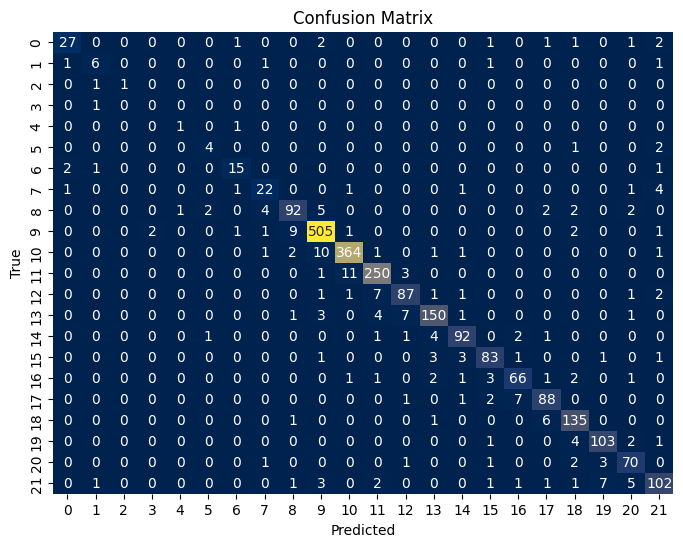

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm1)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.60      0.60      0.60        10
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       0.57      0.57      0.57         7
           8       0.79      0.79      0.79        19
           9       0.73      0.71      0.72        31
          10       0.87      0.84      0.85       110
          11       0.95      0.97      0.96       522
          12       0.96      0.96      0.96       381
          13       0.94      0.94      0.94       265
          14       0.87      0.86      0.87       101
          15       0.93      0.90      0.91       167
          16       0.91      0.90      0.91       102
          17       0.89      0.89      0.89        93
          18       0.86      0.85      0.85        78
          19       0.88    

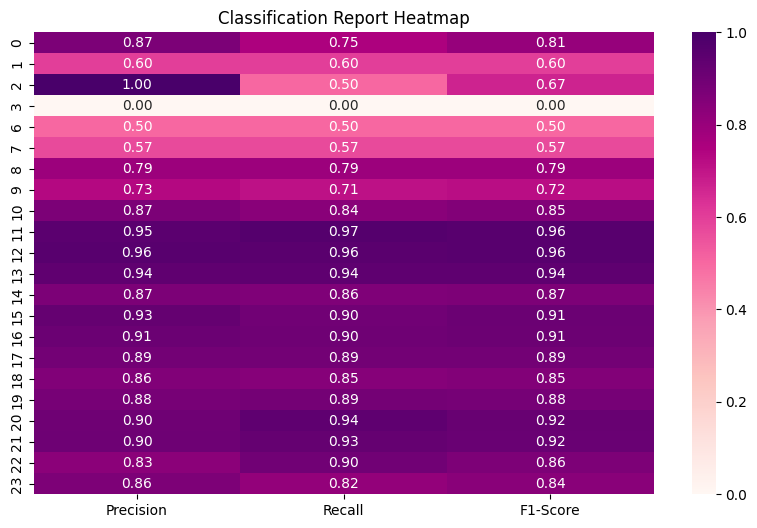

In [ ]:
# Generate a classification report
clr1 = print(classification_report(y_test, y_pred, zero_division=0))

import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='RdPu')
plt.title('Classification Report Heatmap')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('decision_tree', dtc),('gradient_boosting', gbm)], voting='hard')
ensemble_clf.fit(x_train, y_train)
y_pred = ensemble_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Classifier Accuracy:", accuracy)


Ensemble Classifier Accuracy: 0.9109947643979057


Confusion matrix

 [[ 28   1   0   0   1   0   1   0   1   2   0   0   0   0   1   0   0   1
    0   0   0   0]
 [  2   6   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0
    0   0   0   0]
 [  0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   1   0]
 [  2   1   0   0   0   0  15   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  1   0   0   0   0   0   1  24   1   0   0   0   0   0   0   0   0   0
    0   0   4   0]
 [  0   1   0   0   1   2   0   5  96   2   1   0   0   0   0   0   0   0
    0   1   1   0]
 [  0   0   0   2   0   0   1   1   9 506   1   0   1   1   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   1   2  11 366   0  

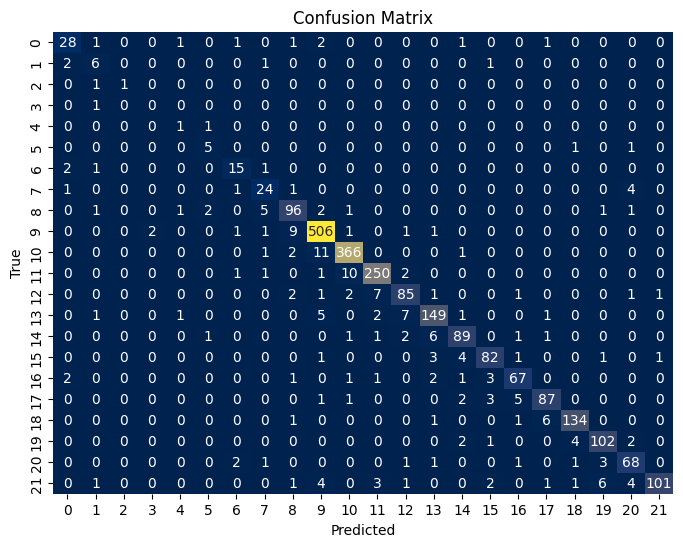

In [ ]:
from sklearn.metrics import confusion_matrix
cm_ens = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm_ens)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_ens, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.46      0.60      0.52        10
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           6       0.25      0.50      0.33         2
           7       0.56      0.71      0.63         7
           8       0.71      0.79      0.75        19
           9       0.69      0.77      0.73        31
          10       0.84      0.87      0.86       110
          11       0.95      0.97      0.96       522
          12       0.96      0.96      0.96       381
          13       0.95      0.94      0.95       265
          14       0.86      0.84      0.85       101
          15       0.91      0.89      0.90       167
          16       0.88      0.87      0.88       102
          17       0.89      0.88      0.89        93
          18       0.87      0.86      0.86        78
          19       0.90    

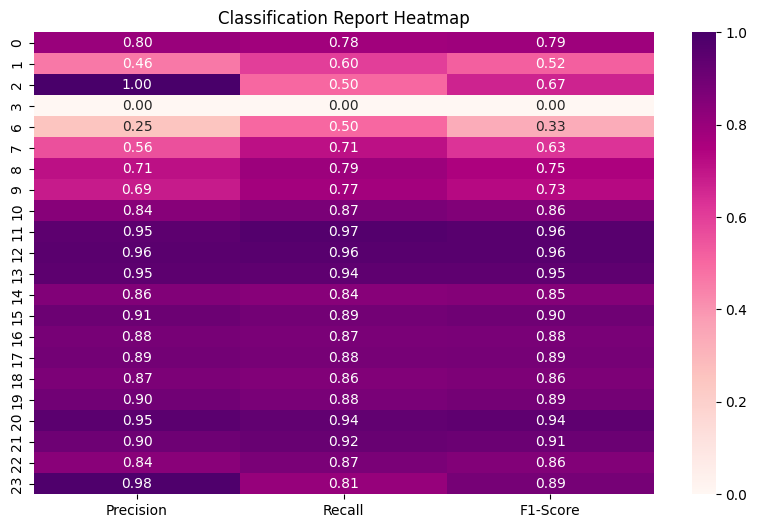

In [ ]:
# Generate a classification report
clr_ens = print(classification_report(y_test, y_pred, zero_division=0))

import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='RdPu')
plt.title('Classification Report Heatmap')
plt.show()
